In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy



In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def display_img(index):
    plt.figure(figsize=(3,2)) #set the size of images
    plt.matshow(x_train[index])#display the image using matshow
    plt.axis('off') #turn off the axis
    plt.title(classes[int(y_train[index])])# set the title of the plot to the corresponding class label

<ipython-input-6-8e8c1bdecebc>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[index])])# set the title of the plot to the corresponding class label


<Figure size 300x200 with 0 Axes>

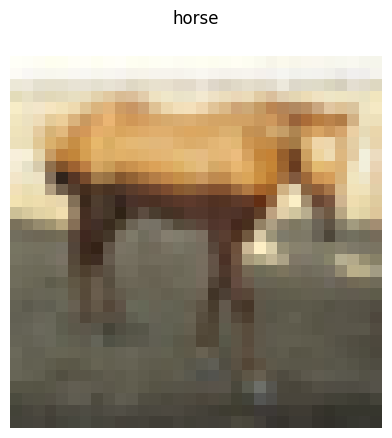

In [7]:
display_img(2000)

In [8]:
model=Sequential()
model.add(Conv2D(10,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),activation='relu',padding='same'))
model.add(Conv2D(100,(3,3),activation='relu',padding='same'))
model.add(Conv2D(150,(3,3),activation='relu',padding='same'))
model.add(Conv2D(200,(3,3),activation='relu',padding='same'))
model.add(Conv2D(250,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
#sparse cartagorical crossentropy is a loss function used in catagorical tasks particularly in scernarios where the target label
#binary crosentropy to meature the diff between predicted binay outcome and actual binay labels

In [10]:
training_history =model.fit(x_train,y_train,epochs=50,batch_size=1000,validation_data=(x_test,y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 445ms/step - accuracy: 0.1010 - loss: 11.6604 - val_accuracy: 0.2215 - val_loss: 2.0532
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 243ms/step - accuracy: 0.2703 - loss: 1.9737 - val_accuracy: 0.3572 - val_loss: 1.7601
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.3768 - loss: 1.7079 - val_accuracy: 0.4312 - val_loss: 1.5506
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.4459 - loss: 1.5445 - val_accuracy: 0.4887 - val_loss: 1.4014
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.5029 - loss: 1.3853 - val_accuracy: 0.4955 - val_loss: 1.3776
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.5391 - loss: 1.2735 - val_accuracy: 0.5410 - val_loss: 1.2848
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 0.5870 - loss: 1.1598 - val_accuracy: 0.5847 - val_loss: 1.1548
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.6251 - loss: 1.0449 - val_acc

In [11]:
hist=training_history.history
hist.keys()
hist['val_accuracy'][-1]

0.6219000220298767

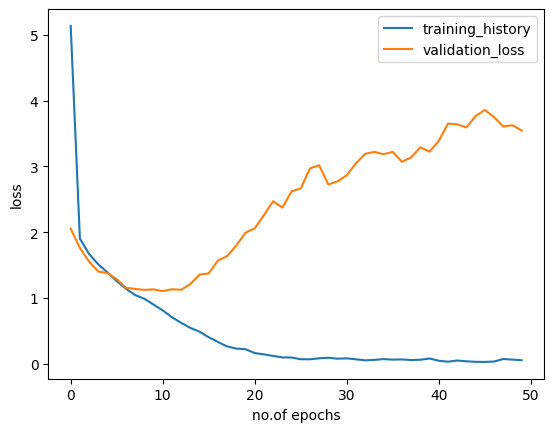

In [12]:
plt.plot(hist['loss'],label='training_history')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')
plt.show()

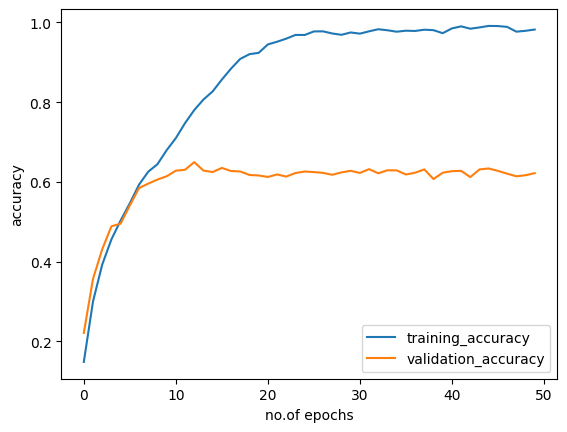

In [13]:
plt.plot(hist['accuracy'],label='training_accuracy')
plt.plot(hist['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')
plt.show()

In [14]:
def predict(index):
  plt.imshow(x_test[index])#to display the image from the test dataset at the specified index
  predict_img=x_test[index].reshape(1,32,32,3)
  predict_prob=model.predict(predict_img)
  perdict_class=np.argmax(predict_prob) #provided by the Numpy library,returns the index of the maximum value in the array
  print('true label',classes[int(y_test[index])])
  print('predcit label',classes[perdict_class])
  plt.show()

In [1]:
predict(20)

NameError: name 'predict' is not defined